In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'AppleGothic'
#plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False
df = pd.read_csv('제주특별자치도_해양환경 연안 측정 데이터_20221120.csv')
df = df.dropna()
df.rename(columns={'수질평가지수(WQI)등급': '수질등급'}, inplace=True)
dummies = pd.get_dummies(df['날씨'], prefix='날씨').astype(int)

df = df.drop('날씨', axis=1)

df = pd.concat([df, dummies], axis=1)

dummies = pd.get_dummies(df['수층'], prefix='수층').astype(int)

df = df.drop('수층', axis=1)

df = pd.concat([df, dummies], axis=1)

df['측정 일자'] = pd.to_datetime(df['측정 일자'])
df['년'] = df['측정 일자'].dt.year.astype(int)
df['월'] = df['측정 일자'].dt.month.apply(lambda x: f'{x:02d}').astype(int)
df['일'] = df['측정 일자'].dt.day.apply(lambda x: f'{x:02d}').astype(int)
#df = df.drop(['측정 일자'],axis = 1)

df = df.drop(['측정 연도',	'측정 월','위도',	'경도'],axis = 1)

In [17]:
daejeong = df[df['정점명'].isin(['대정1', '대정2', '대정3'])].drop(['정점명'], axis=1)

In [18]:
daejeong

,측정 일자,수심,투명도,수질등급,수온,염분,수소이온농도,용존산소량,화학적산소요구량,암모니아성질소,...,클로로필에이,날씨_구름많음,날씨_구름조금,날씨_맑음,날씨_흐림,수층_저층,수층_표층,년,월,일
0,2021-11-20,20.0,9.0,1,19.91,34.17,8.12,8.18,0.58,6.50,...,0.93,0,0,1,0,0,1,2021,11,20
1,2021-11-20,28.0,9.0,2,20.27,34.14,8.15,9.00,1.71,3.26,...,2.90,0,0,1,0,0,1,2021,11,20
2,2021-11-20,28.0,10.0,1,19.94,34.16,8.14,9.34,1.40,6.55,...,1.24,0,0,1,0,0,1,2021,11,20
9,2021-11-20,20.0,9.0,1,19.73,34.20,8.11,8.16,0.35,14.69,...,0.76,0,0,1,0,1,0,2021,11,20
10,2021-11-20,28.0,9.0,2,19.82,34.13,8.15,9.16,0.42,8.79,...,1.64,0,0,1,0,1,0,2021,11,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1597,2011-02-23,30.0,7.6,1,14.77,34.48,8.11,9.22,1.78,21.60,...,0.64,0,0,1,0,0,1,2011,2,23
1598,2011-02-23,30.0,8.4,1,14.65,34.48,8.10,9.89,0.47,62.00,...,0.84,0,0,1,0,0,1,2011,2,23
1604,2011-02-23,20.0,8.0,1,14.64,34.48,8.10,8.97,1.57,33.80,...,0.44,0,0,1,0,1,0,2011,2,23
1605,2011-02-23,30.0,7.6,1,14.69,34.48,8.10,9.13,1.82,64.60,...,1.39,0,0,1,0,1,0,2011,2,23


In [19]:
daejeong.columns

Index(['측정 일자', '수심', '투명도', '수질등급', '수온', '염분', '수소이온농도', '용존산소량', '화학적산소요구량',
       '암모니아성질소', '아질산성질소', '질산성질소', '용존무기질소', '총질소', '용존무기인', '총인', '규산규소',
       '부유물질', '클로로필에이', '날씨_구름많음', '날씨_구름조금', '날씨_맑음', '날씨_흐림', '수층_저층',
       '수층_표층', '년', '월', '일'],
      dtype='object')

In [20]:
year_avg = daejeong.groupby('년')['수온'].mean()

year_avg

년
2011    19.186250
2012    17.976667
2013    18.838750
2014    18.738333
2015    19.138750
2016    19.144167
2017    19.510000
2018    18.162083
2019    19.526667
2020    19.501667
2021    18.828333
Name: 수온, dtype: float64

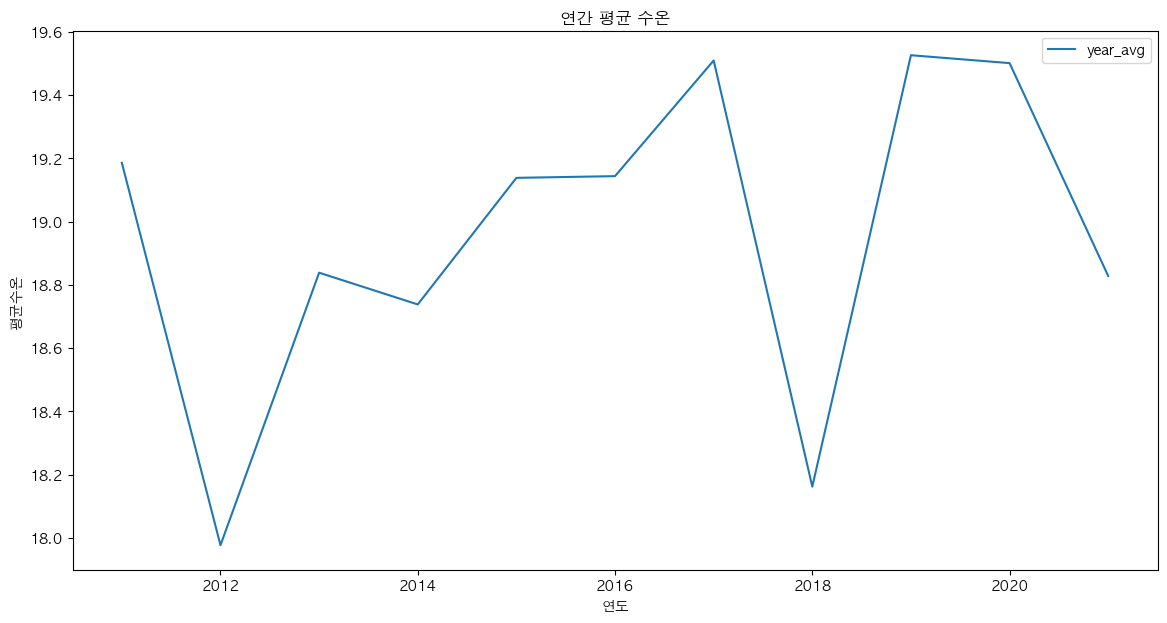

In [21]:
plt.figure(figsize=(14, 7))
plt.plot(year_avg, label='year_avg')
plt.title('연간 평균 수온')
plt.xlabel('연도')
plt.ylabel('평균수온')
plt.legend()
plt.show()

In [22]:
month_avg = daejeong.groupby(['년', '월'])['수온'].mean()

month_avg

년     월 
2011  2     14.676667
      5     15.473333
      8     24.105000
      11    22.490000
2012  2     14.806667
      5     17.058333
      8     22.065000
2013  2     14.073333
      5     16.046667
      8     24.013333
      11    21.221667
2014  2     15.005000
      5     17.031667
      8     23.210000
      11    19.706667
2015  2     14.183333
      5     16.740000
      8     24.306667
      11    21.325000
2016  2     14.345000
      5     16.438333
      8     24.173333
      11    21.620000
2017  2     15.403333
      5     16.181667
      8     23.778333
      11    22.676667
2018  2     14.063333
      5     16.448333
      8     21.123333
      11    21.013333
2019  2     15.451667
      5     16.460000
      8     23.575000
      11    22.620000
2020  2     15.425000
      5     16.695000
      8     24.878333
      11    21.008333
2021  2     15.313333
      5     17.666667
      8     22.435000
      11    19.898333
Name: 수온, dtype: float64

/Users/juwonkim/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/juwonkim/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


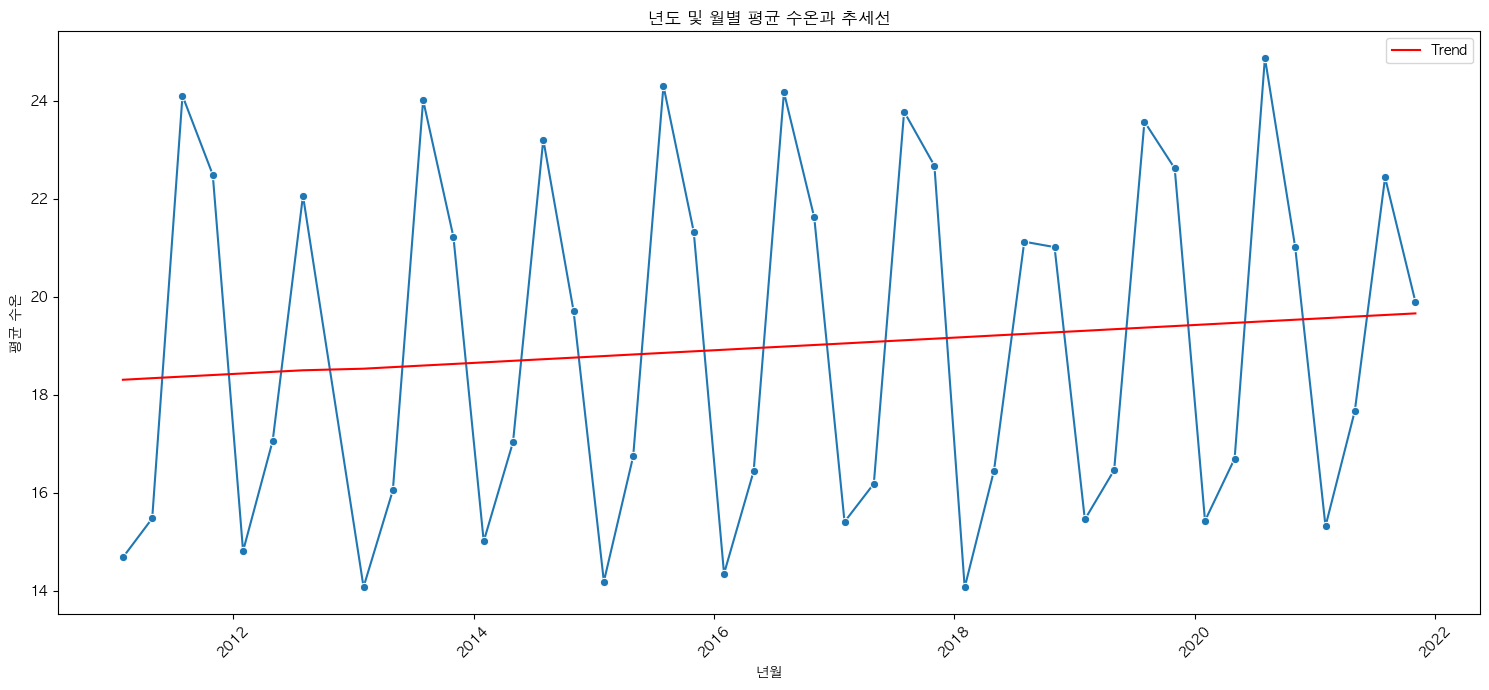

In [23]:
from sklearn.linear_model import LinearRegression

monthly_avg_temp_df = month_avg.reset_index()
monthly_avg_temp_df['년월'] = monthly_avg_temp_df['년'].astype(str) + '-' + monthly_avg_temp_df['월'].astype(str)
monthly_avg_temp_df['년월'] = pd.to_datetime(monthly_avg_temp_df['년월'])

# 선 그래프 그리기
plt.figure(figsize=(15, 7))
sns.lineplot(x='년월', y='수온', data=monthly_avg_temp_df, marker='o')

# 추세선 추가하기
# 날짜 데이터를 숫자로 변환 (LinearRegression을 위해)
X = np.array(monthly_avg_temp_df.index).reshape(-1, 1)
y = monthly_avg_temp_df['수온']

# 선형 회귀 모델 생성 및 학습
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# 추세선 계산
trend = lin_reg.predict(X)

# 추세선 그리기
plt.plot(monthly_avg_temp_df['년월'], trend, label='Trend', color='red')

# 그래프 설정
plt.title('년도 및 월별 평균 수온과 추세선')
plt.xlabel('년월')
plt.ylabel('평균 수온')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [24]:
train_df = daejeong[daejeong['년'] < 2021].drop('측정 일자', axis = 1)

test_df = daejeong[daejeong['년'] == 2021].drop('측정 일자', axis = 1)

X_train = train_df.drop('수온', axis=1)
y_train = train_df['수온']

X_test = test_df.drop('수온', axis=1)
y_test = test_df['수온']



In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

predictions = model.predict(X_test)

mae = mean_absolute_error(y_test, predictions)
print("MAE : ", mae)


MAE :  0.8240833333333321


In [26]:
predictions

array([20.285 , 21.5726, 20.1607, 20.0464, 20.4447, 20.2187, 25.9751,
       18.8035, 24.8877, 26.0423, 20.3226, 18.7133, 16.6829, 16.8162,
       17.0438, 16.5325, 16.6335, 16.7679, 15.5995, 15.6891, 15.6482,
       15.6304, 15.6075, 15.7263])

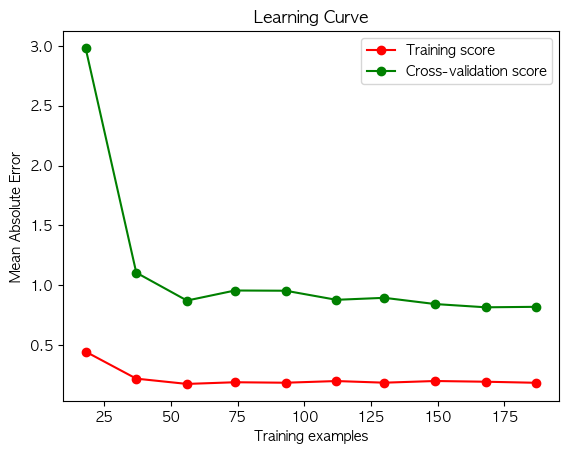

In [27]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    RandomForestRegressor(random_state=42), 
    X_train, 
    y_train, 
    n_jobs=-1, 
    train_sizes=np.linspace(.1, 1.0, 10), 
    scoring='neg_mean_absolute_error'
)

train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Mean Absolute Error")
plt.legend(loc="best")
plt.show()


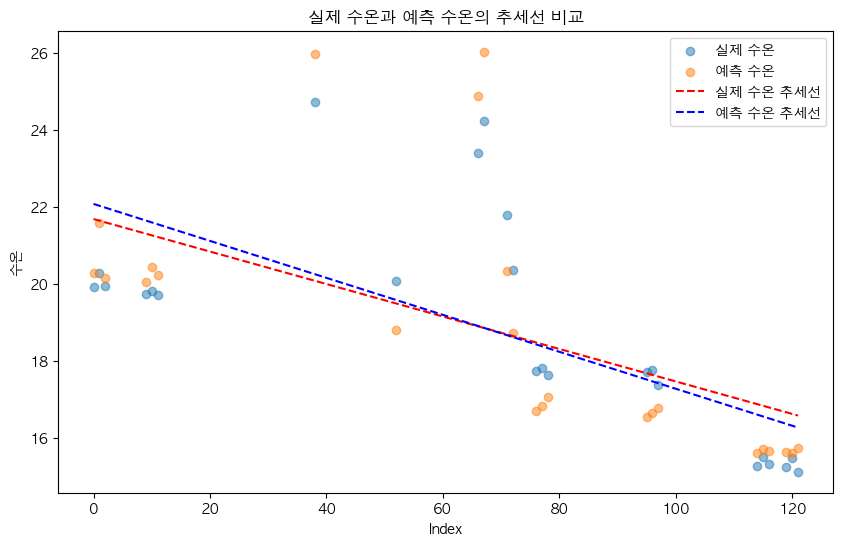

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# 실제 값에 대한 추세선 계산
z = np.polyfit(y_test.index, y_test, 1)
p = np.poly1d(z)

# 예측 값에 대한 추세선 계산
z_pred = np.polyfit(y_test.index, predictions, 1)
p_pred = np.poly1d(z_pred)

# 산점도 그리기
plt.figure(figsize=(10, 6))
plt.scatter(y_test.index, y_test, label='실제 수온', alpha=0.5)
plt.scatter(y_test.index, predictions, label='예측 수온', alpha=0.5)

# 추세선 그리기
plt.plot(y_test.index, p(y_test.index), "r--", label='실제 수온 추세선')
plt.plot(y_test.index, p_pred(y_test.index), "b--", label='예측 수온 추세선')

plt.title('실제 수온과 예측 수온의 추세선 비교')
plt.xlabel('Index')
plt.ylabel('수온')
plt.legend()
plt.show()


In [29]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

knn_model = KNeighborsRegressor(n_neighbors=5)

knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

# 성능 평가
mae = mean_absolute_error(y_test, y_pred)
print("MAE : ", mae)

MAE :  2.0615


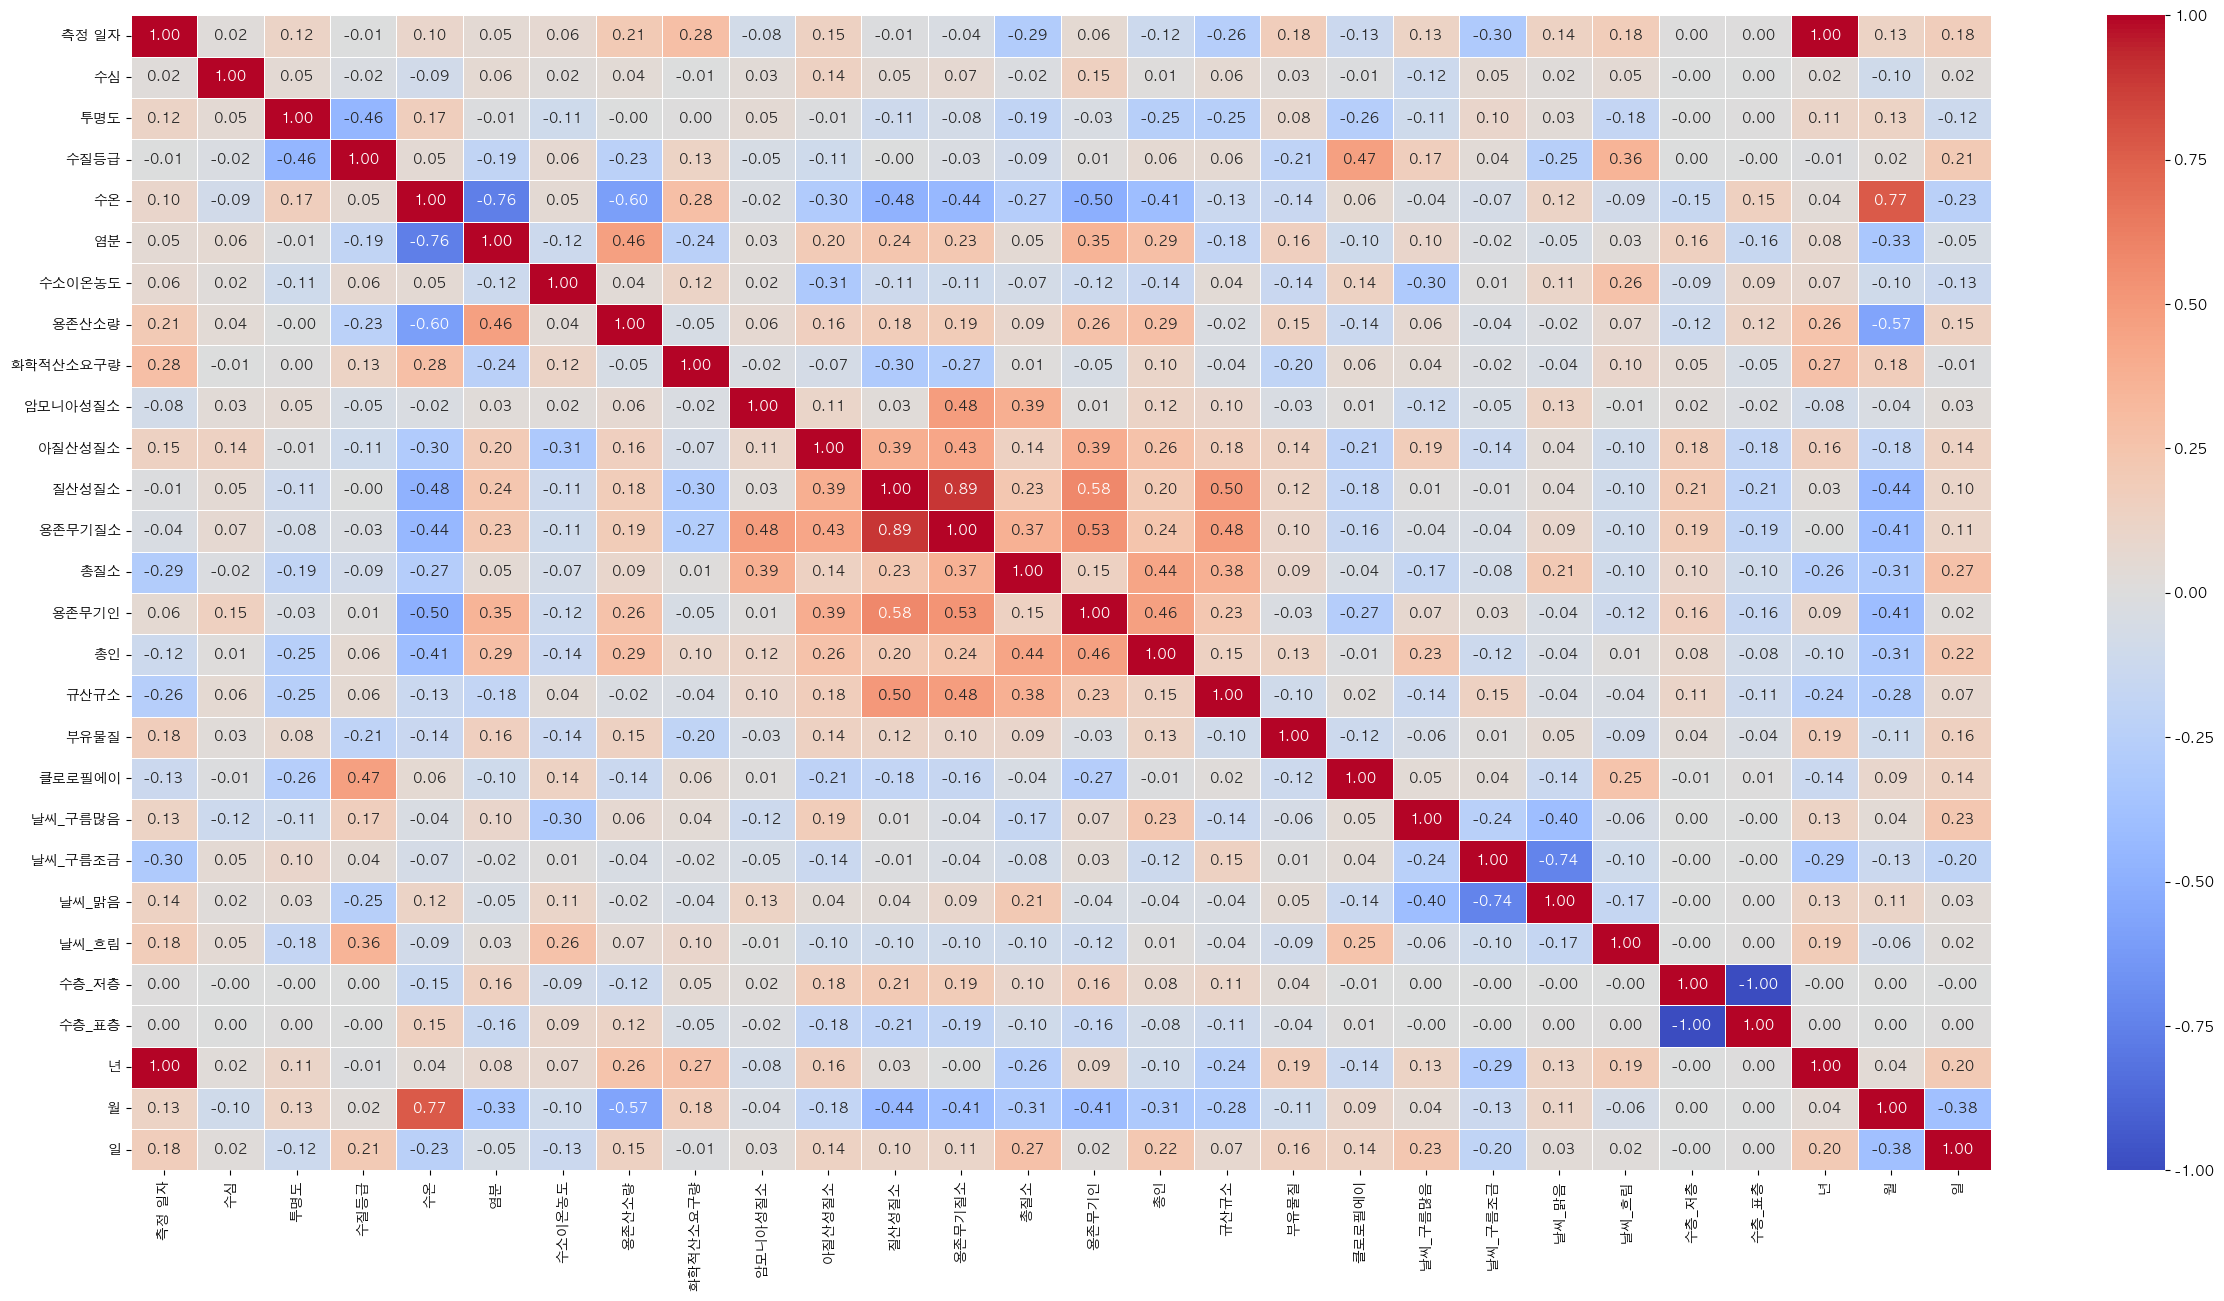

In [30]:
daejeongcorr = daejeong.corr()


plt.figure(figsize=(30, 15))
sns.heatmap(daejeongcorr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.show()

In [31]:
temp = daejeong.drop(['측정 일자', '수심', '투명도', '수질등급', '염분', '수소이온농도', '용존산소량',
       '화학적산소요구량', '암모니아성질소', '아질산성질소', '질산성질소', '용존무기질소', '총질소', '용존무기인',
       '총인', '규산규소', '부유물질', '클로로필에이', 
       '수층_저층', '수층_표층', '년', '일'],axis=1)

In [32]:
temp

,수온,날씨_구름많음,날씨_구름조금,날씨_맑음,날씨_흐림,월
0,19.91,0,0,1,0,11
1,20.27,0,0,1,0,11
2,19.94,0,0,1,0,11
9,19.73,0,0,1,0,11
10,19.82,0,0,1,0,11
...,...,...,...,...,...,...
1597,14.77,0,0,1,0,2
1598,14.65,0,0,1,0,2
1604,14.64,0,0,1,0,2
1605,14.69,0,0,1,0,2


In [33]:
tempcorrs=temp.corr()


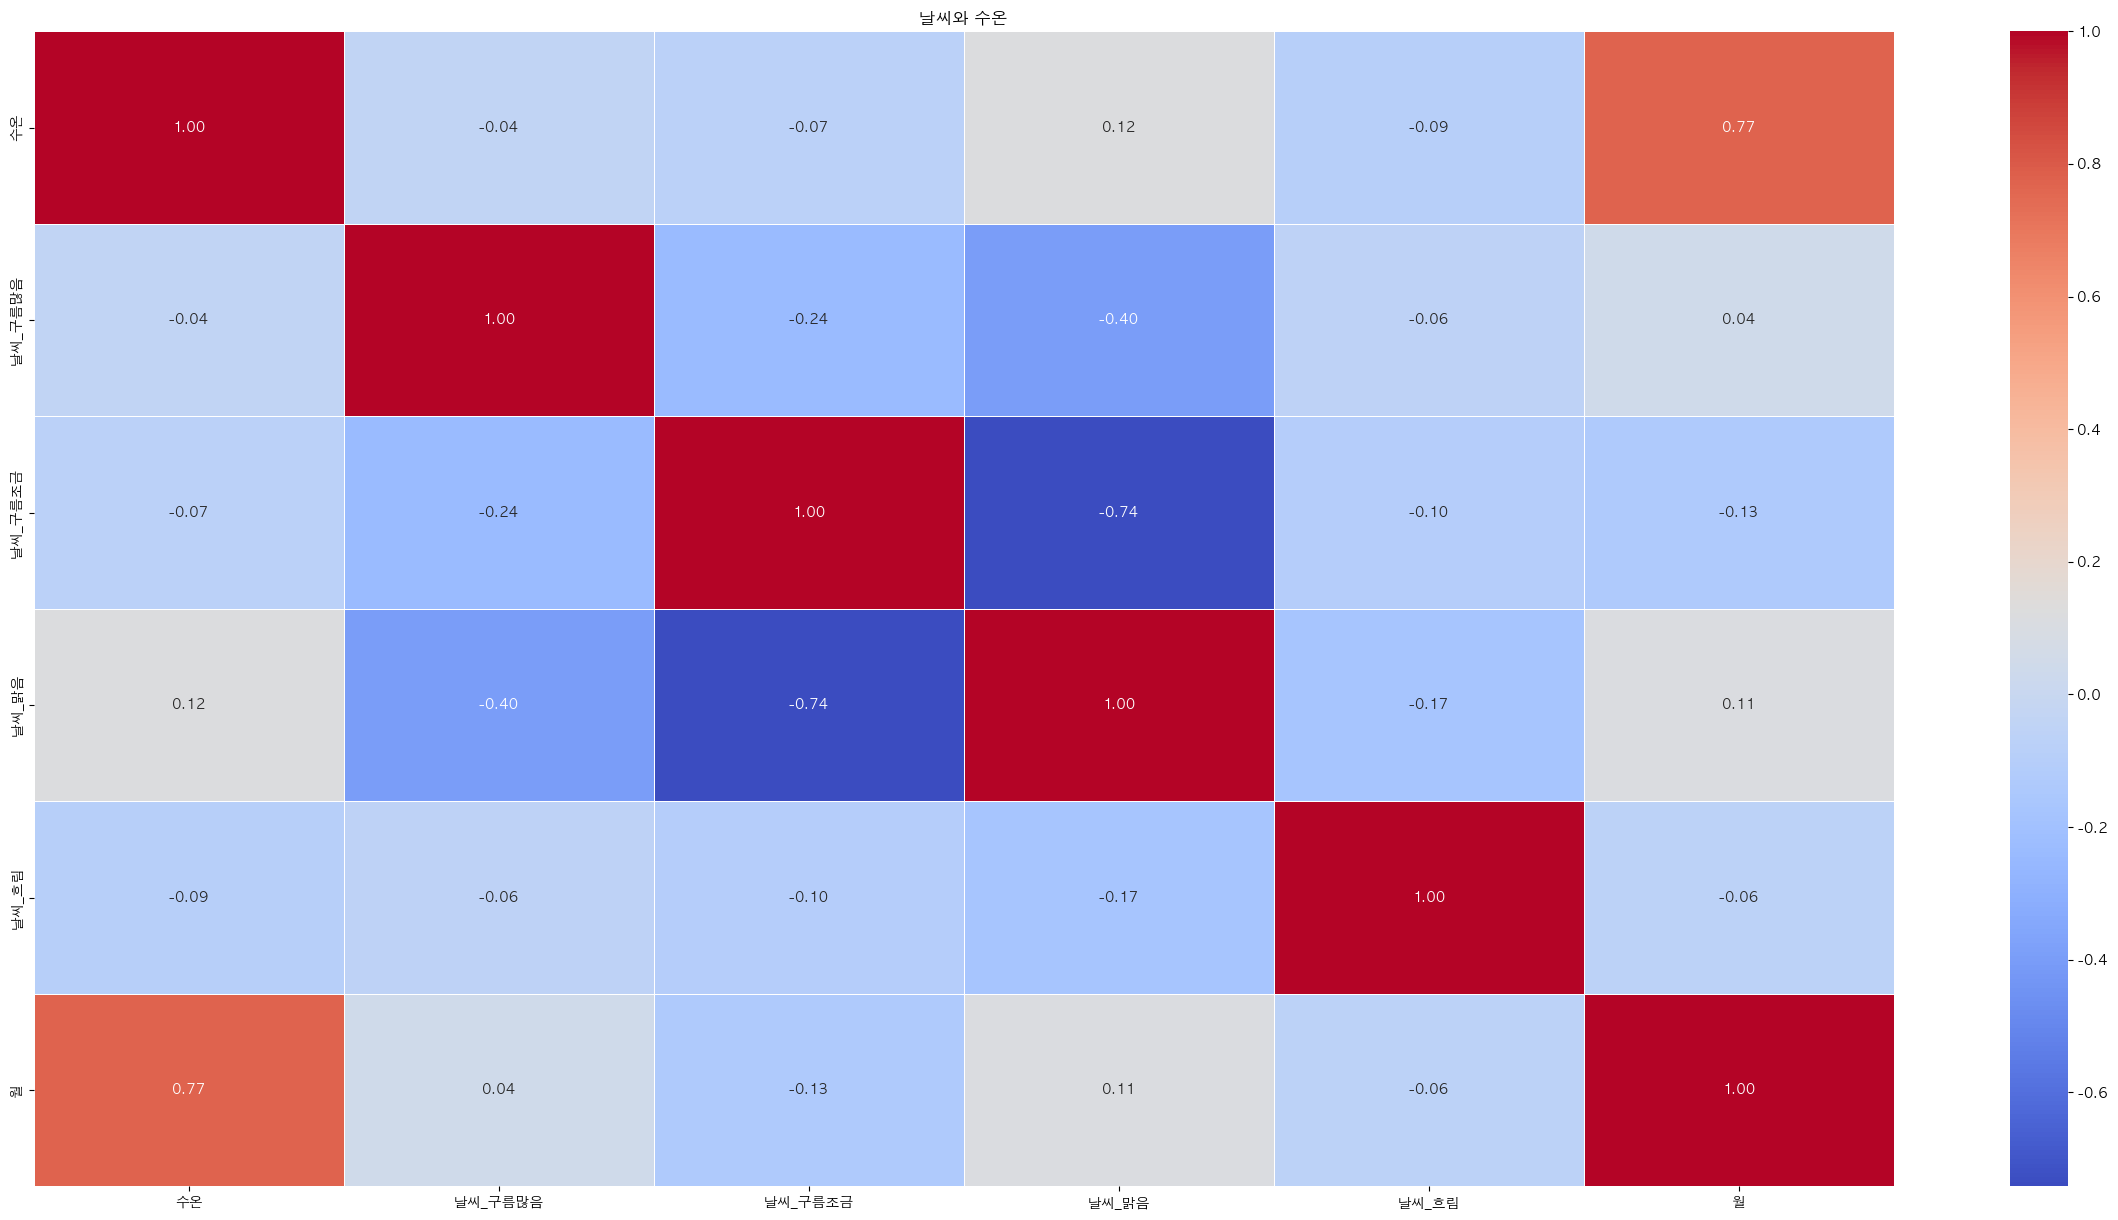

In [34]:
plt.figure(figsize=(30, 15))
sns.heatmap(tempcorrs, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('날씨와 수온')
plt.show()

In [35]:
che = daejeong.drop(['측정 일자', '수심', '투명도', '수질등급', '수온', '염분',  '날씨_구름많음', '날씨_구름조금', '날씨_맑음', '날씨_흐림', '수층_저층',
       '수층_표층', '년', '월', '일'],axis = 1)

In [36]:
checorrs = che.corr()

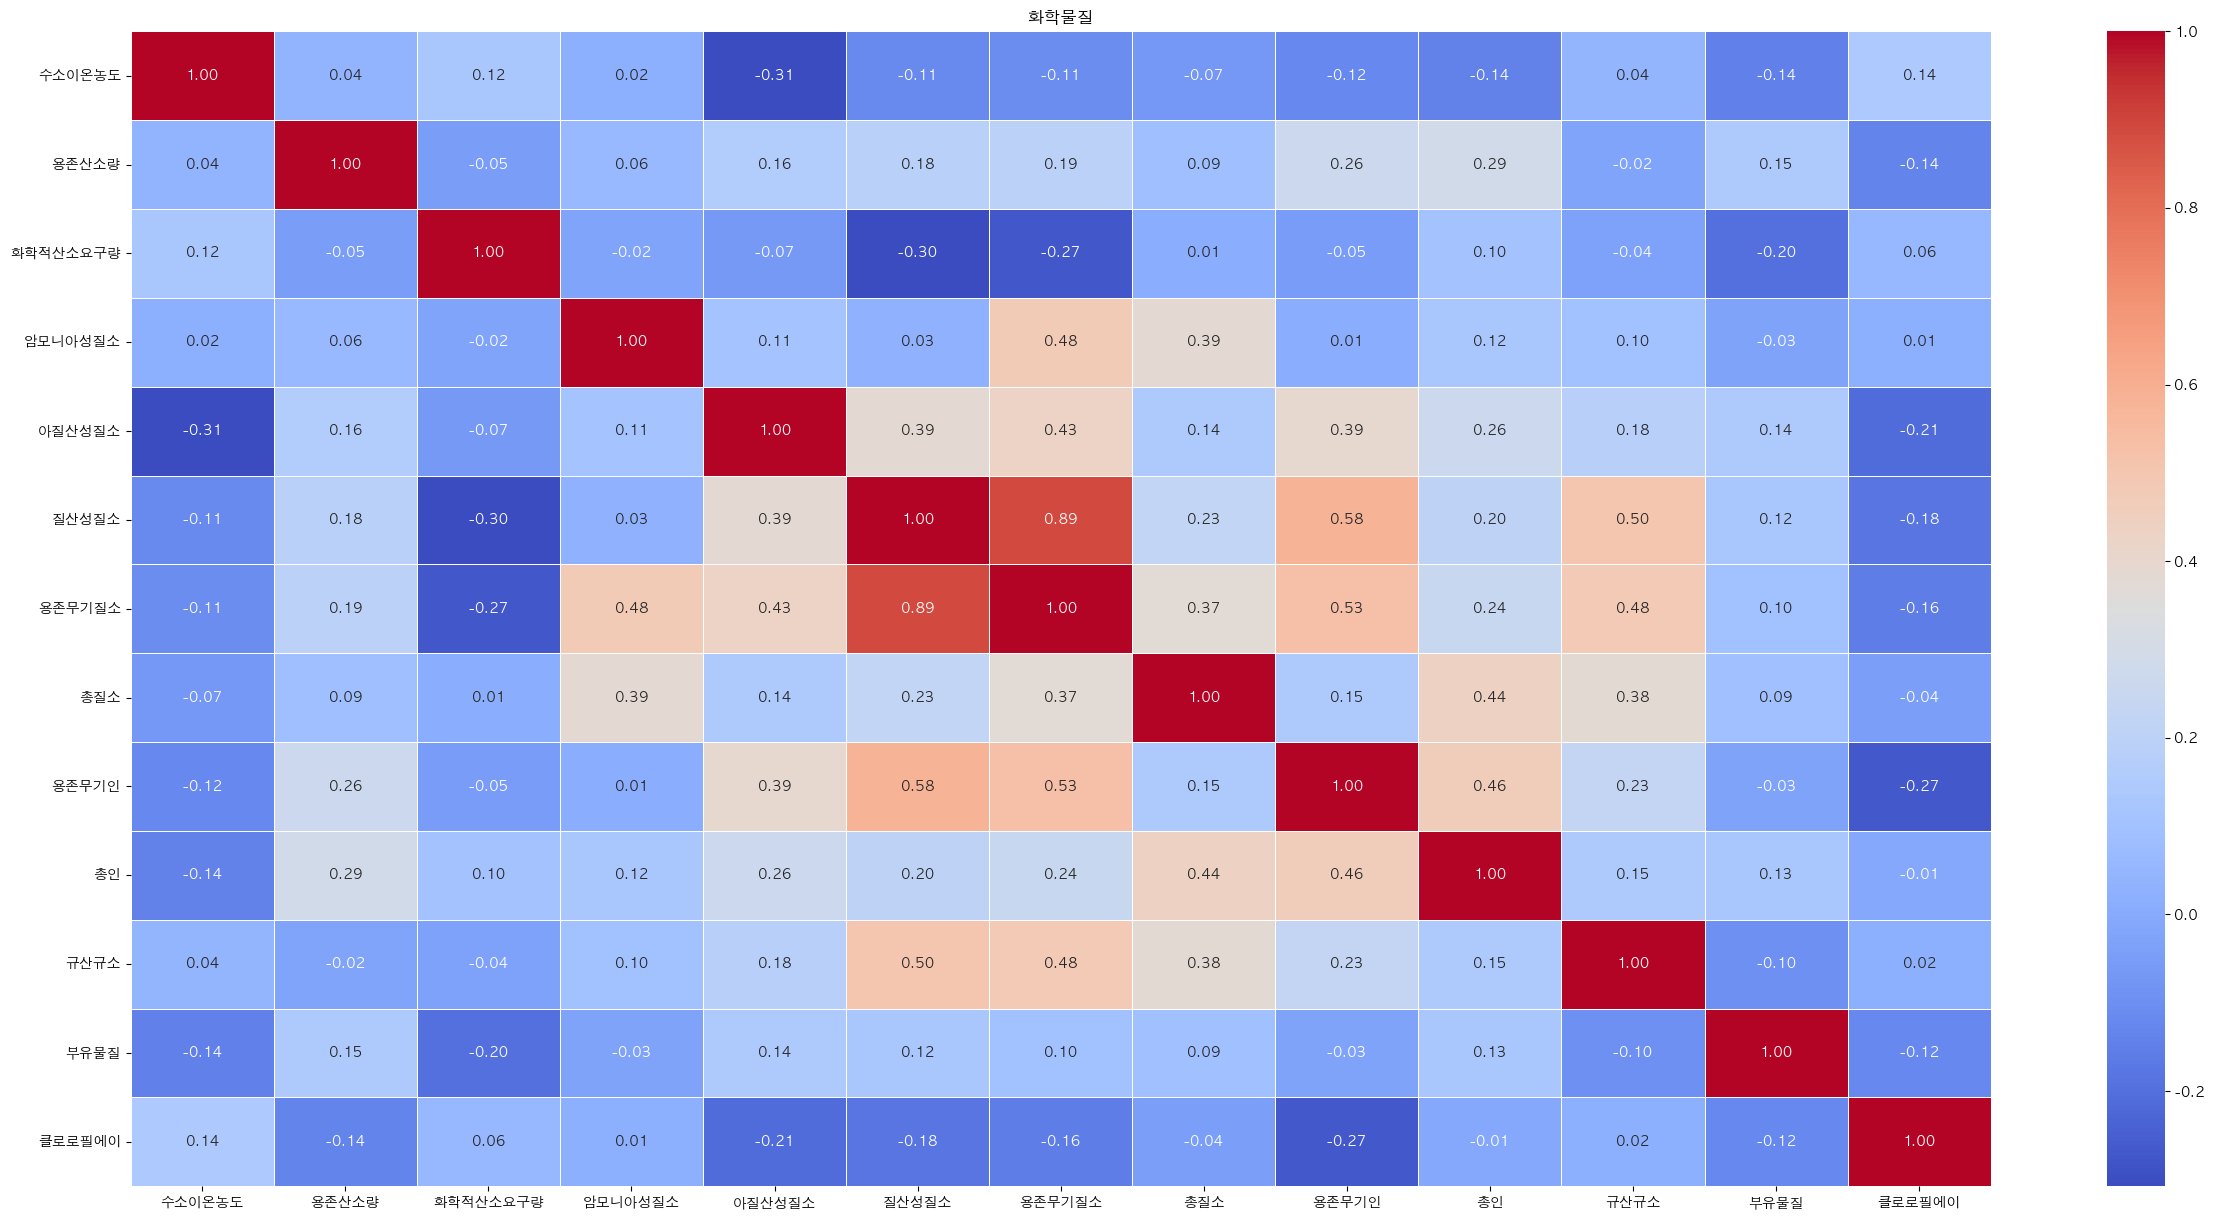

In [37]:
plt.figure(figsize=(30, 15))
sns.heatmap(checorrs, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('화학물질')
plt.show()

In [38]:
che2 = daejeong.drop(['측정 일자', '수심', '투명도', '수질등급', '염분',  '날씨_구름많음', '날씨_구름조금', '날씨_맑음', '날씨_흐림', '수층_저층',
       '수층_표층', '년', '월', '일'],axis = 1)

In [39]:
che2corrs = che2.corr()

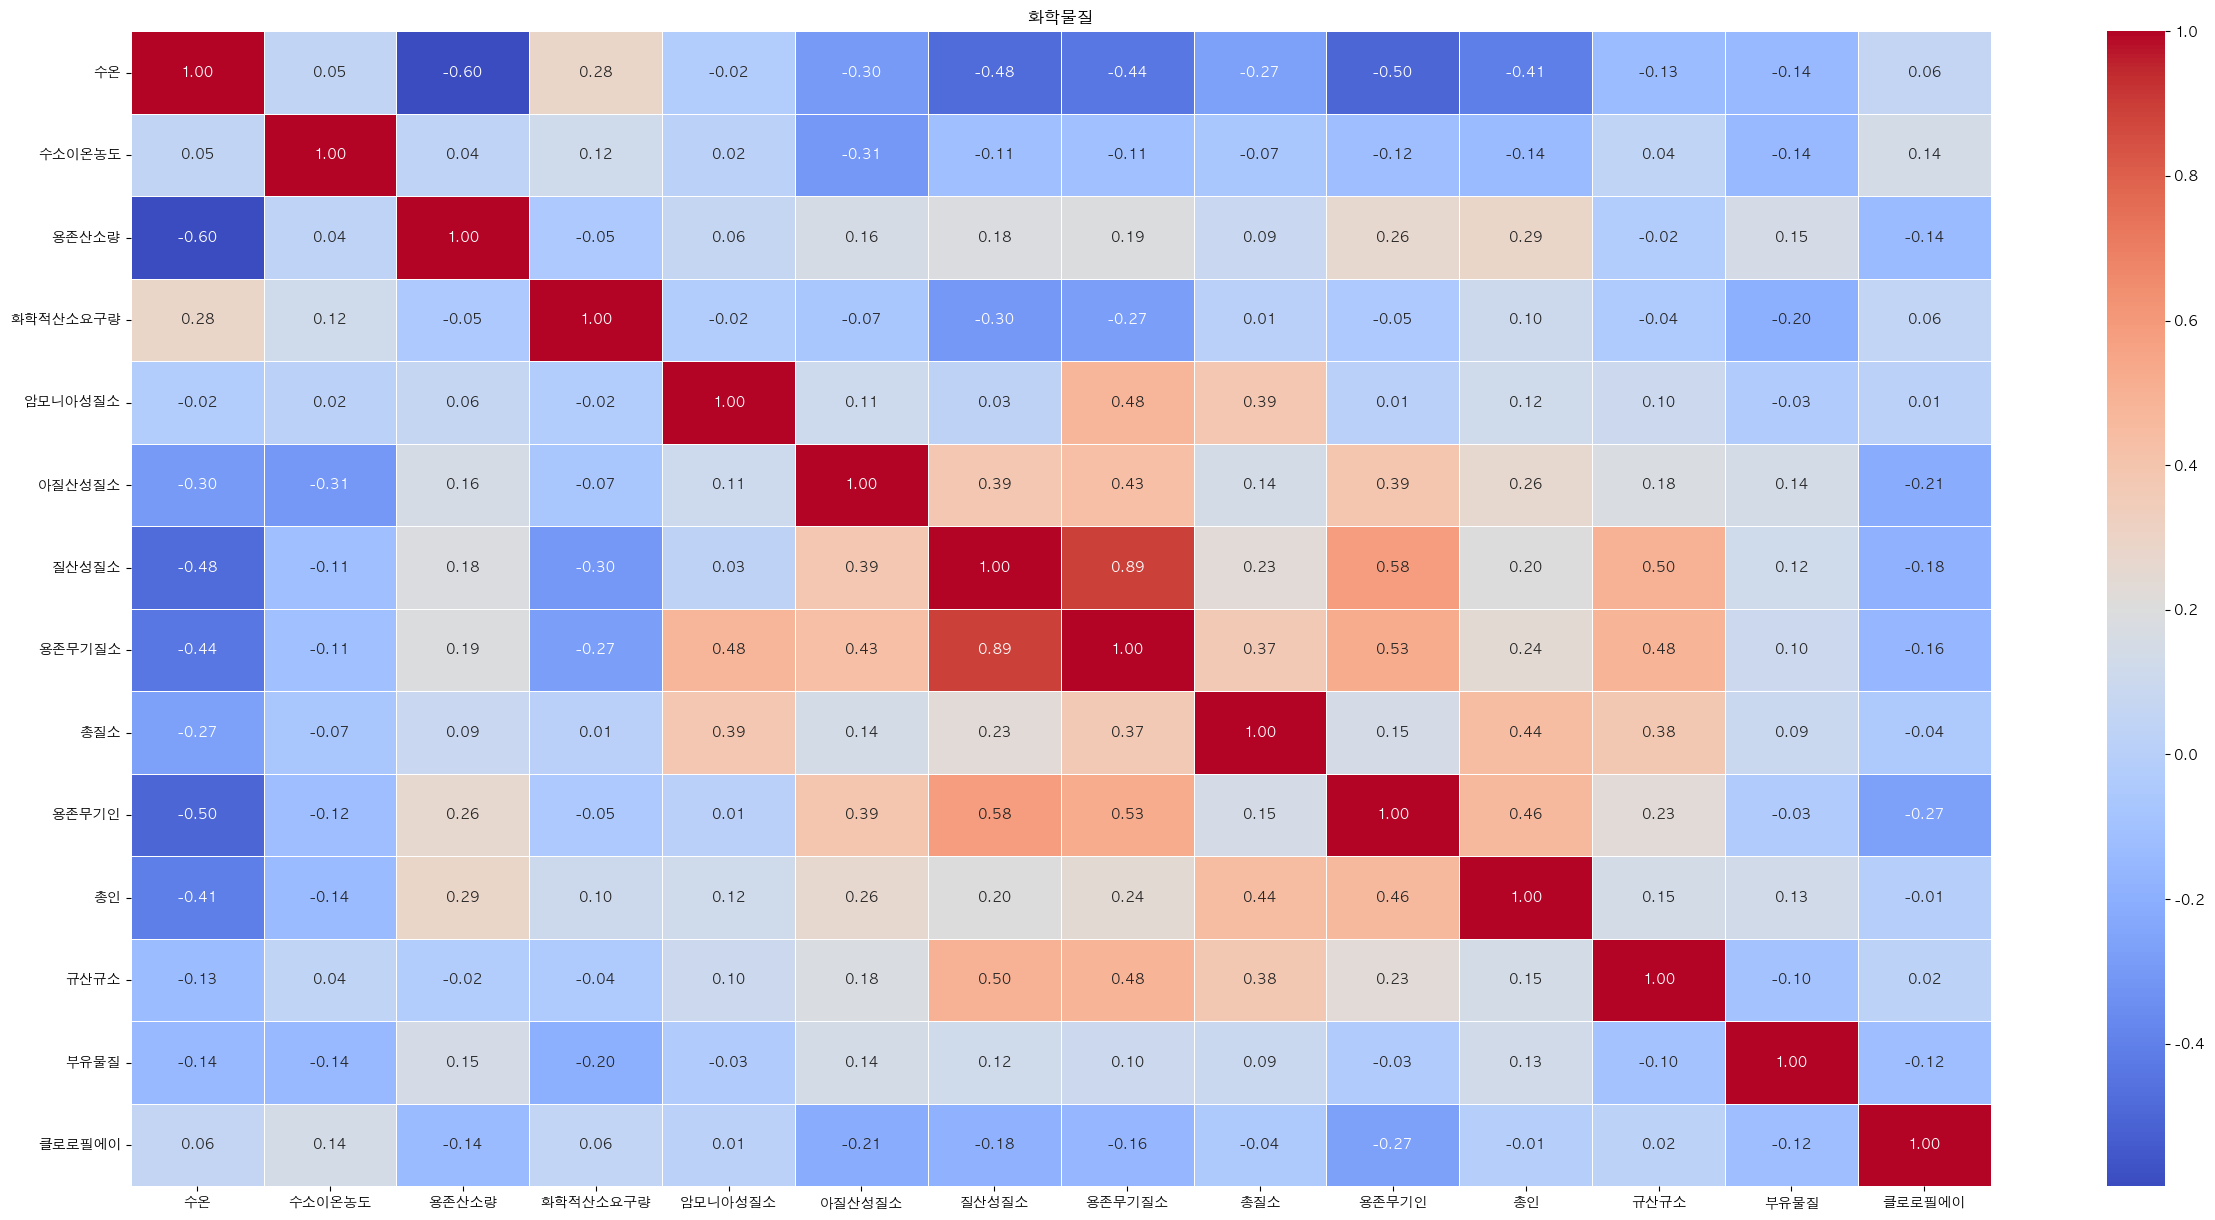

In [40]:
plt.figure(figsize=(30, 15))
sns.heatmap(che2corrs, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('화학물질')
plt.show()

/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_91304/2854875270.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_91304/2854875270.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_91304/2854875270.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_91304/2854875270.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_91304/2854875270.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_91304/2854875270.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_91304

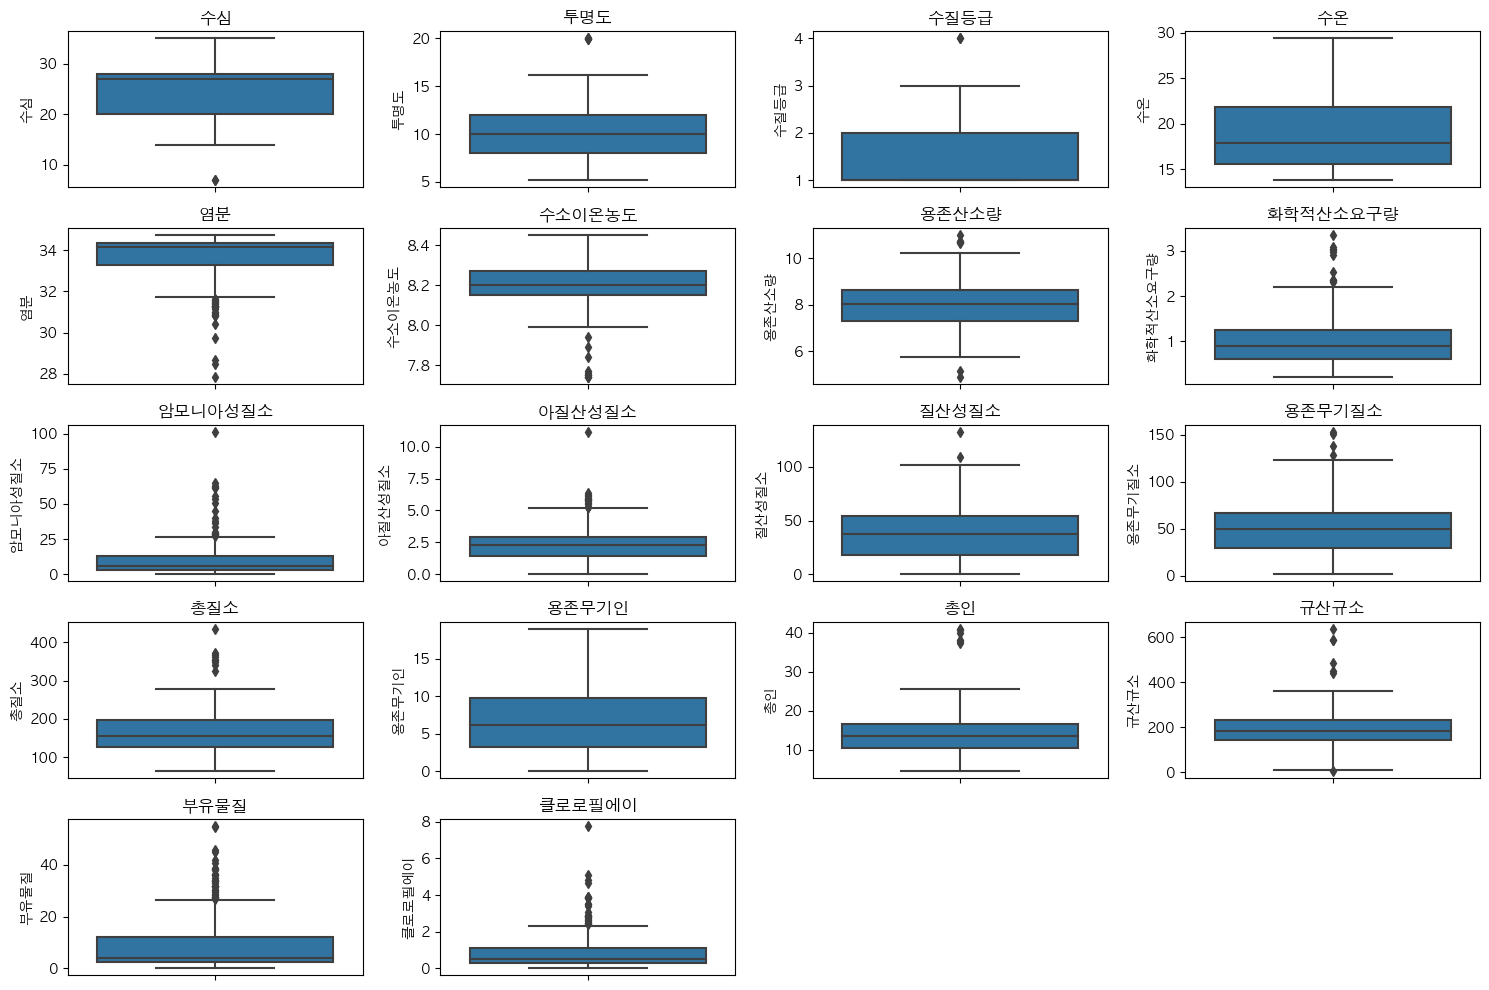

In [41]:
columns = ['수심', '투명도', '수질등급', '수온', '염분', '수소이온농도', '용존산소량', '화학적산소요구량',
       '암모니아성질소', '아질산성질소', '질산성질소', '용존무기질소', '총질소', '용존무기인', '총인', '규산규소',
       '부유물질', '클로로필에이'
]

plt.figure(figsize=(15, 10))
for i, column in enumerate(columns, 1):
    plt.subplot(5, 4, i)  
    sns.boxplot(y=daejeong[column])
    plt.title(column)
    plt.tight_layout()

plt.show()

/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_91304/2741746228.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_91304/2741746228.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_91304/2741746228.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_91304/2741746228.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_91304/2741746228.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_91304/2741746228.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_91304/27417

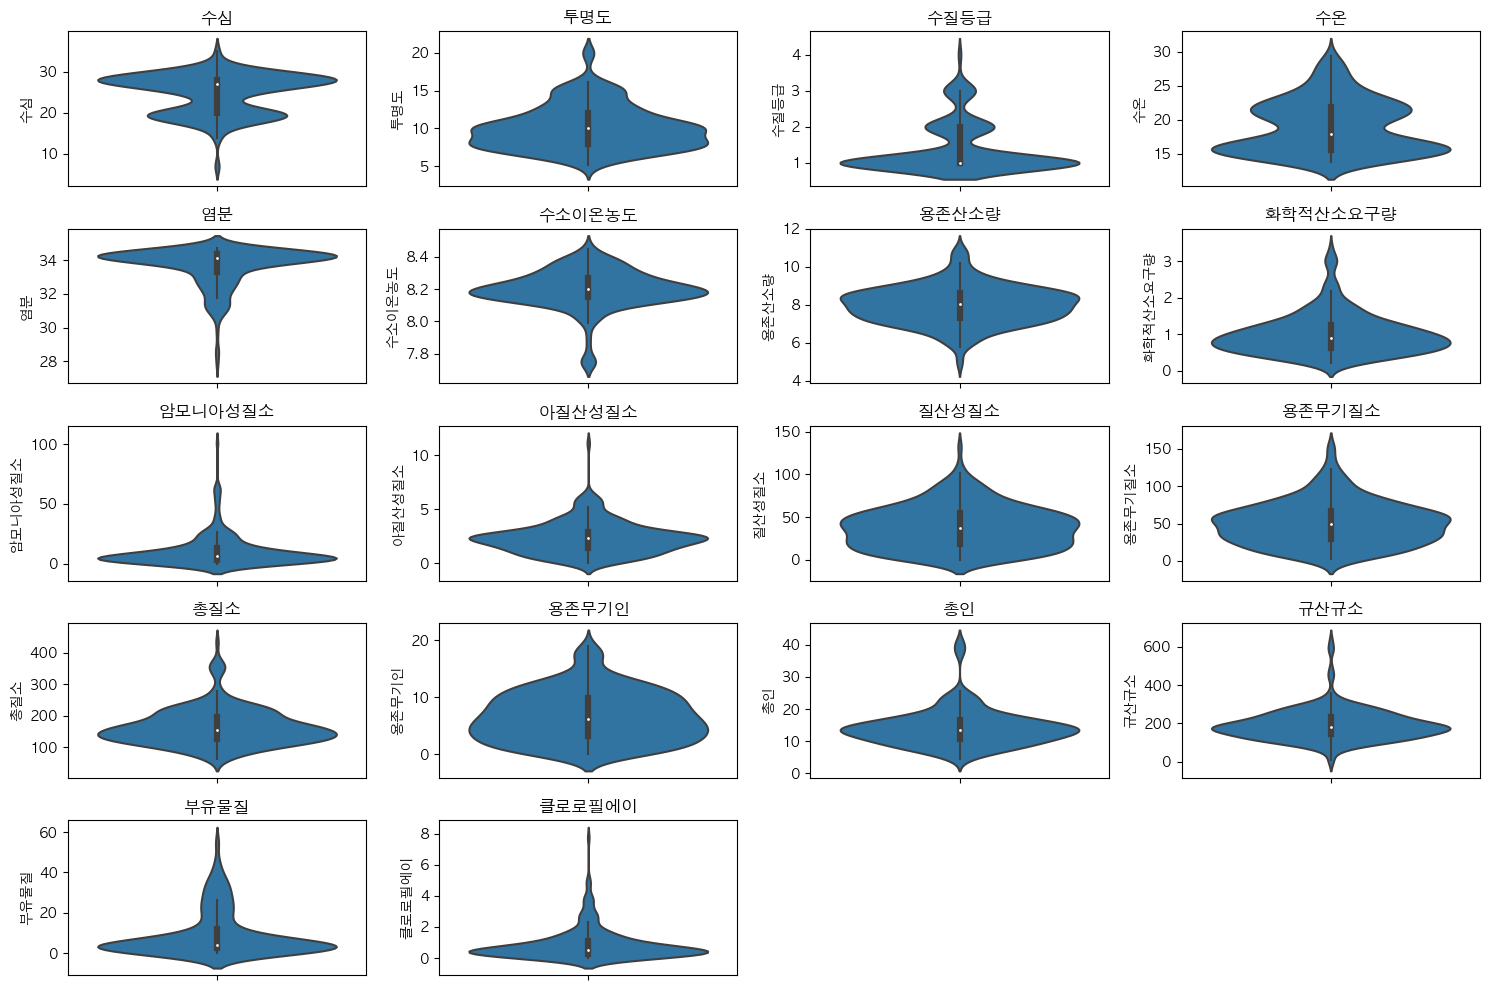

In [42]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns, 1):
    plt.subplot(5, 4, i)  
    sns.violinplot(y=daejeong[column])
    plt.title(column)
    plt.tight_layout()

plt.show()

/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_91304/28311131.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_91304/28311131.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_91304/28311131.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_91304/28311131.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_91304/28311131.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_91304/28311131.py:7: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
/var/folders/jk/7yn2gh2d6xl2nb2cbhp3pdtw0000gn/T/ipykernel_91304/28311131.py:7: Us

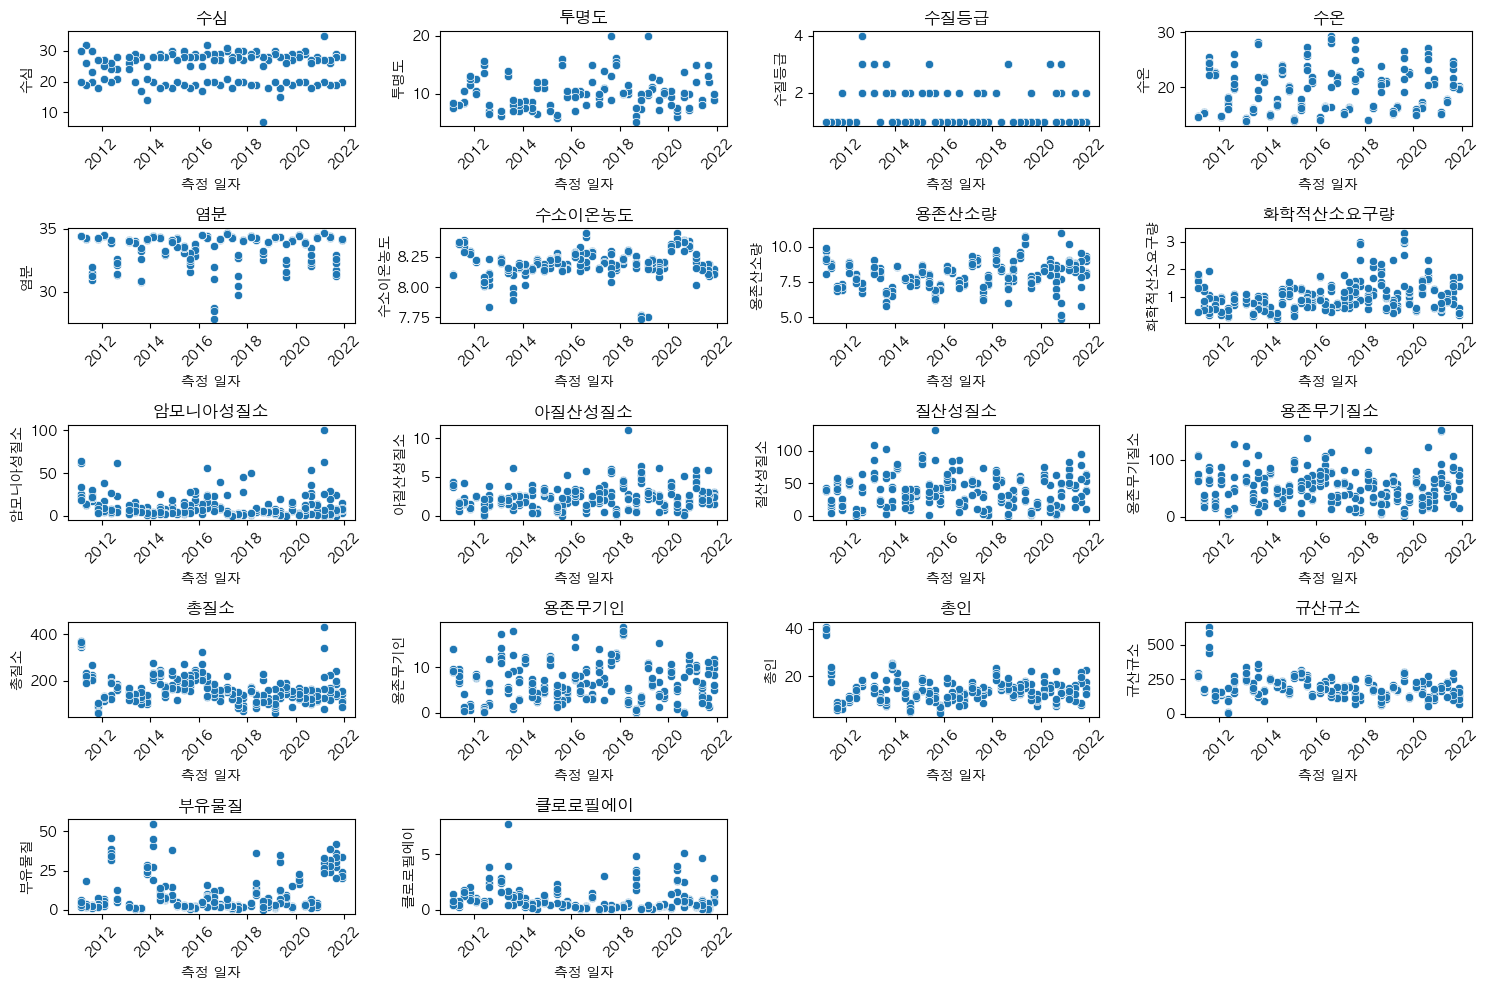

In [43]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns, 1):
    plt.subplot(5, 4, i)  
    sns.scatterplot(data=daejeong, x='측정 일자', y=column)
    plt.title(column)
    plt.xticks(rotation=45) 
    plt.tight_layout()

plt.show()

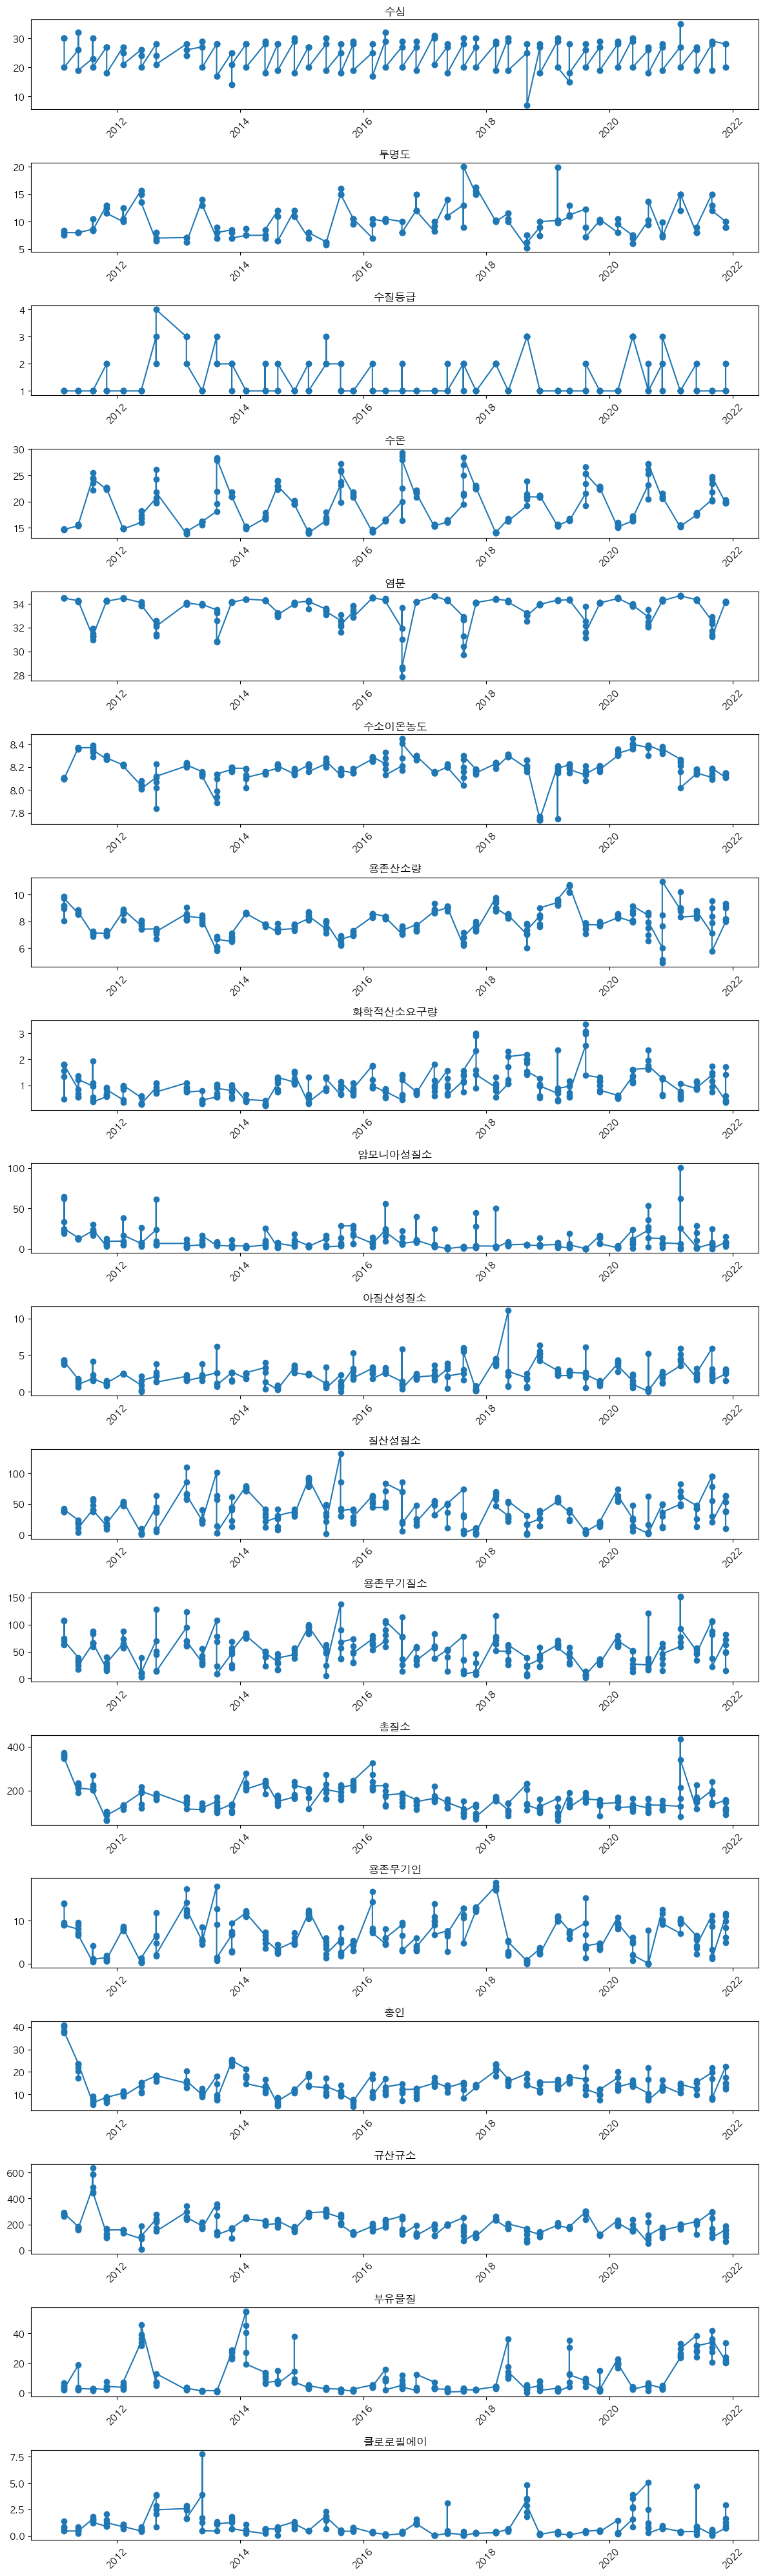

In [44]:
fig, axes = plt.subplots(len(columns), 1, figsize=(12, 40))

for i, column in enumerate(columns):
    axes[i].plot(daejeong['측정 일자'], daejeong[column], label=column, marker='o')
    axes[i].set_title(column)
    axes[i].set_xlabel(None)
    axes[i].set_ylabel(None)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


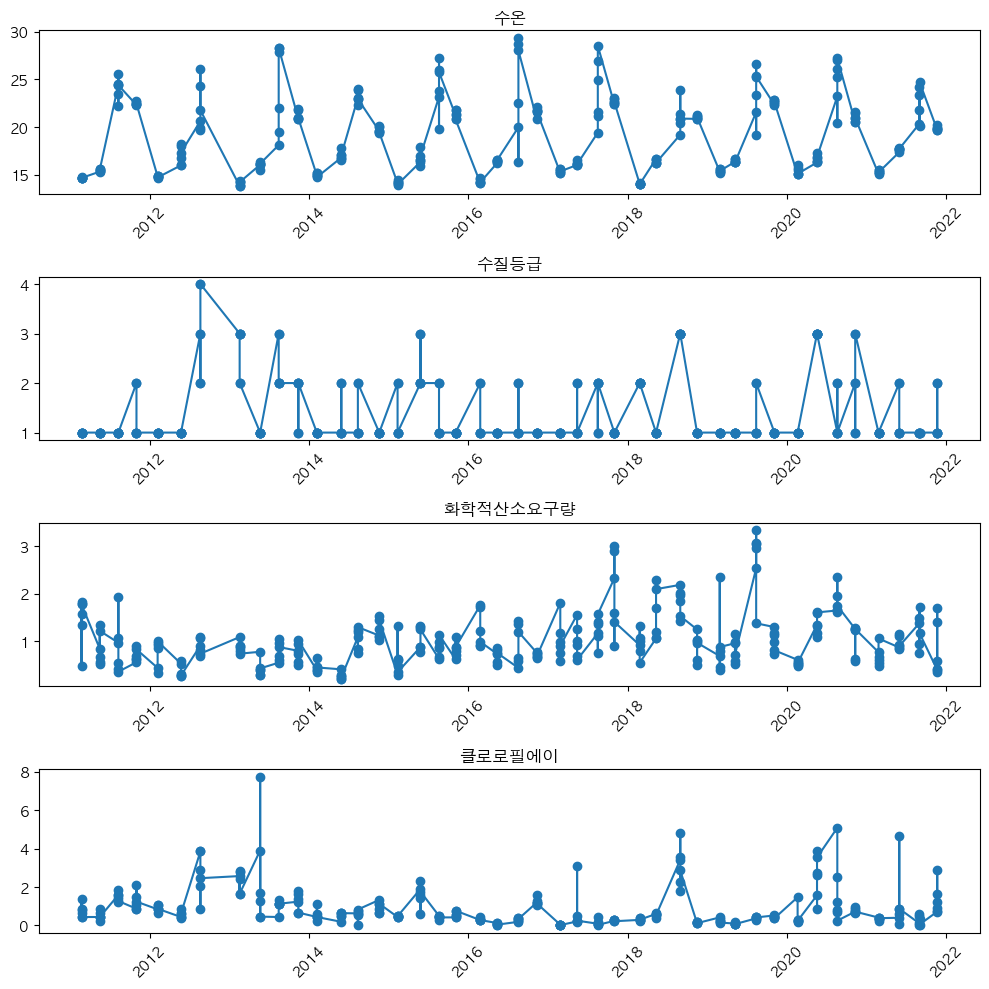

In [45]:
new_col = ['수온','수질등급', '화학적산소요구량','클로로필에이']
fig, axes = plt.subplots(len(new_col), 1, figsize=(10, 10))

for i, column in enumerate(new_col):
    axes[i].plot(daejeong['측정 일자'], daejeong[column], label=column, marker='o')
    axes[i].set_title(column)
    axes[i].set_xlabel(None)
    axes[i].set_ylabel(None)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numerical_features_for_standardization = daejeong.drop(['측정 일자','년','월','일'], axis=1).select_dtypes(include=['float64', 'int64'])

standardized_features = scaler.fit_transform(numerical_features_for_standardization)

standardized_features_df = pd.DataFrame(standardized_features, columns=numerical_features_for_standardization.columns)

daejeong = pd.concat([daejeong['측정 일자'], standardized_features_df], axis=1)

daejeong.head()


,측정 일자,수심,투명도,수질등급,수온,염분,수소이온농도,용존산소량,화학적산소요구량,암모니아성질소,...,총인,규산규소,부유물질,클로로필에이,날씨_구름많음,날씨_구름조금,날씨_맑음,날씨_흐림,수층_저층,수층_표층
0,2021-11-20,-1.005724,-0.388121,-0.596372,0.239448,0.447036,-0.629923,0.178746,-0.766901,-0.296647,...,-0.174717,-0.444923,2.133585,0.042798,-0.362738,-0.670402,0.903826,-0.154303,-1.0,1.0
1,2021-11-20,0.665624,-0.388121,0.855175,0.332346,0.420966,-0.381927,1.006581,1.258300,-0.548703,...,0.570915,-1.544066,1.100515,1.990209,-0.362738,-0.670402,0.903826,-0.154303,-1.0,1.0
2,2021-11-20,0.665624,-0.040188,-0.596372,0.247189,0.438346,-0.464593,1.349829,0.702714,-0.292757,...,0.109004,-0.785502,1.268278,0.349243,-0.362738,-0.670402,0.903826,-0.154303,-1.0,1.0
9,2021-11-20,0.665624,1.699479,-0.596372,1.359390,-1.960128,-0.051265,-0.134216,-0.462224,-0.452237,...,-0.958409,-0.723579,1.846621,-0.273533,-0.362738,-0.670402,0.903826,-0.154303,-1.0,1.0
10,2021-11-20,-1.214642,1.003612,-0.596372,0.724584,-1.178017,-0.464593,1.006581,0.864014,-0.335544,...,0.474035,0.692431,2.862033,-0.846882,-0.362738,-0.670402,0.903826,-0.154303,1.0,-1.0


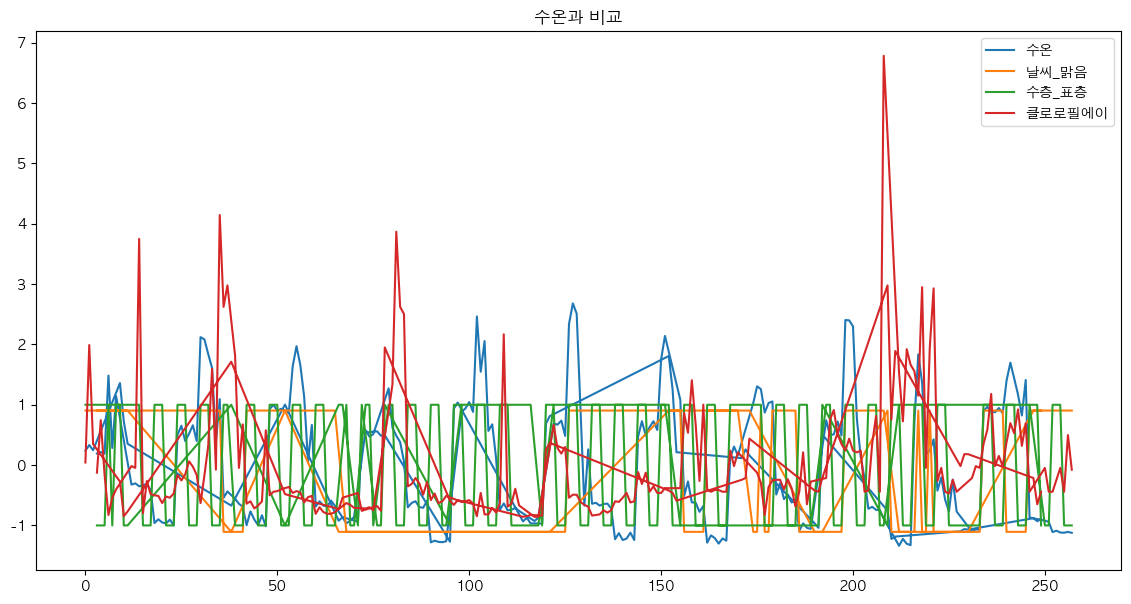

In [50]:
plt.figure(figsize=(14, 7))
plt.plot(daejeong['수온'], label='수온')
plt.plot(daejeong['날씨_맑음'], label='날씨_맑음')
plt.plot(daejeong['수층_표층'], label='수층_표층')
plt.plot(daejeong['클로로필에이'], label='클로로필에이')

plt.title('수온과 비교')

plt.legend()
plt.show()

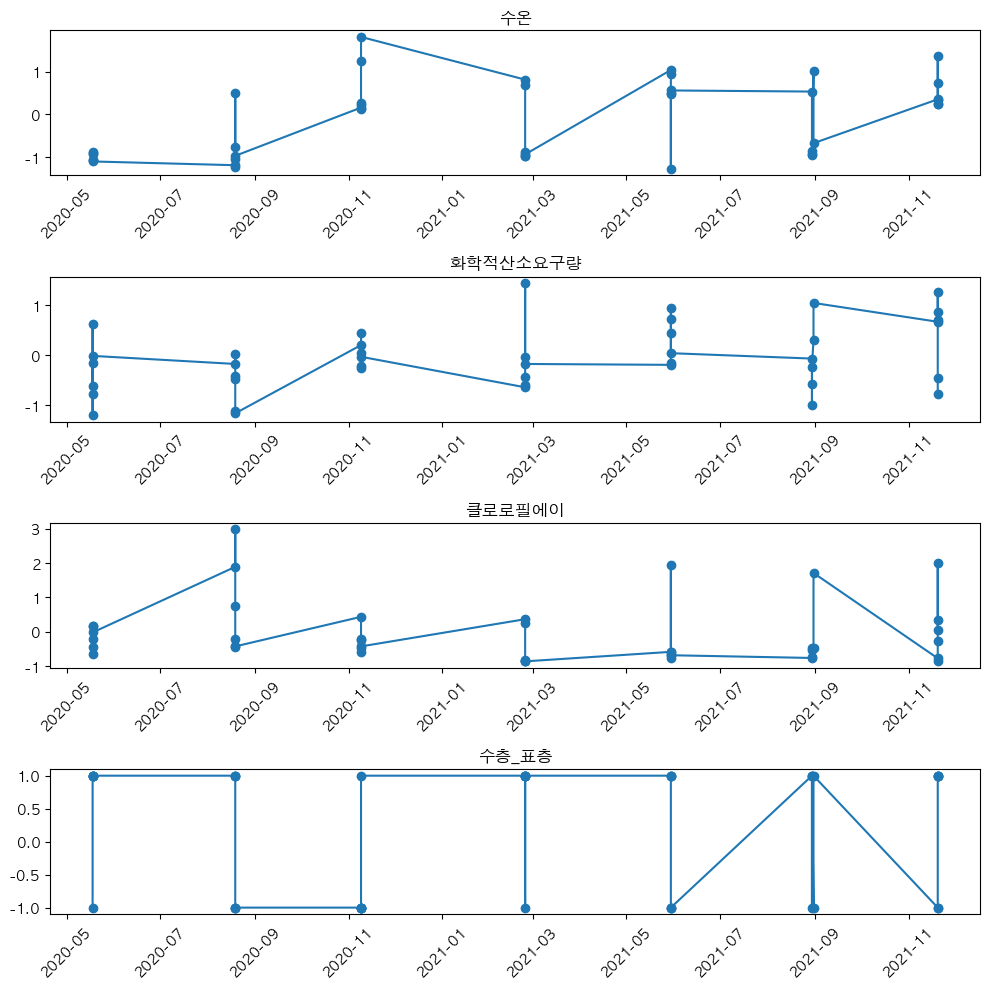

In [51]:
new_col = ['수온', '화학적산소요구량','클로로필에이','수층_표층']
fig, axes = plt.subplots(len(new_col), 1, figsize=(10, 10))

for i, column in enumerate(new_col):
    axes[i].plot(daejeong['측정 일자'], daejeong[column], label=column, marker='o')
    axes[i].set_title(column)
    axes[i].set_xlabel(None)
    axes[i].set_ylabel(None)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()
